<head>
<h1><font size = '+4'>Model Classification on Early Modern vs. Modern English via Poetry</font></h1>
</head>

<h2><font size='+1'> Introducing my Natural Language Processing project, I have decided to combine a topic of interest for myself, poetry, and explore the power of natural language processing models. <br>
<br>
I am specifically assessing the ability of various common models in distinguising between modern and early modern english. I am utilizing a public dataset that contains over 500 poems from both Renaissance and modern times. I will be utilizing skills and algorithms from our class that I have obtained throughout the semester.<br>
<br>
Some questions I have going into this project that I would like to have answered are:<br> <font size = '3'>
- What words are more important for early modern vs modern english, through the use of TF-IDF?<br>
- How accurately can basic classification models predict the age of poems? <br>
- Which models, of the most popular, have the highest accuracy in these predictions? <br>
- How high of an accuracy can I obtain in the highest-performing classification model?</font>


</font><h2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statistics as stat
import re
import string
import nltk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [3]:
df = pd.read_csv('all.csv')

In [4]:
df.head(10)

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore
5,RICHARD BARNFIELD,"Cherry-lipt Adonis in his snowie shape,\r\n ...",Sonnet 17,Renaissance,Mythology & Folklore
6,SIR WALTER RALEGH,Praisd be Dianas fair and harmless light;\r\nP...,Praisd be Dianas Fair and Harmless Light,Renaissance,Mythology & Folklore
7,QUEEN ELIZABETH I,"When I was fair and young, then favor graced m...",When I Was Fair and Young,Renaissance,Mythology & Folklore
8,JOHN DONNE,"When by thy scorn, O murd'ress, I am dead\r\n ...",The Apparition,Renaissance,Mythology & Folklore
9,JOHN SKELTON,"Pla ce bo,\r\nWho is there, who?\r\nDi le xi,\...",The Book of Phillip Sparrow,Renaissance,Mythology & Folklore


# Exploratory Data Analysis


In [5]:
author_count = pd.DataFrame(df['author'].value_counts(), columns=['count']).reset_index()

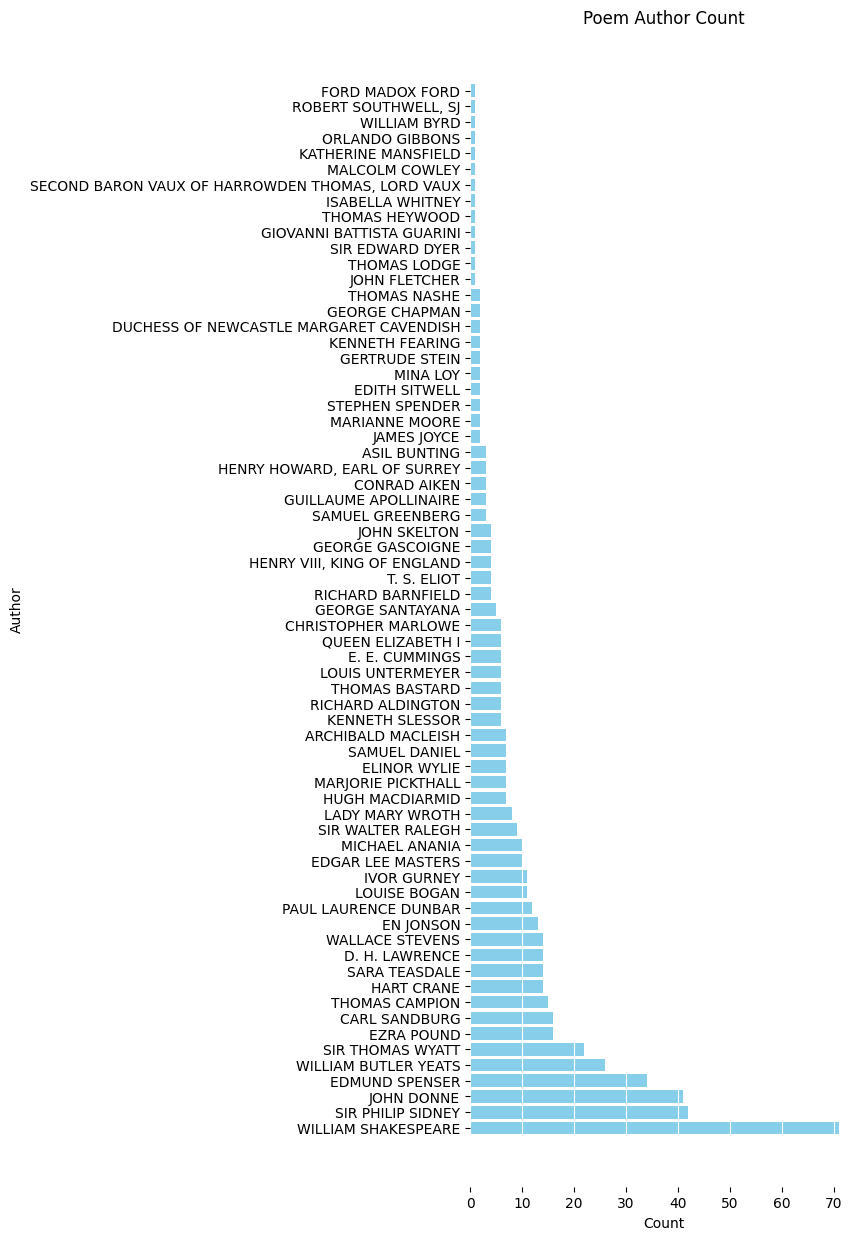

In [6]:
plt.figure(figsize = (5,15),frameon=False)
plt.barh(author_count['author'],author_count['count'],color='skyblue')
plt.yticks(author_count['author'])
plt.grid(color = 'White', axis = 'x')
plt.xlabel('Count')
plt.ylabel('Author')
plt.title('Poem Author Count')
plt.box(False)
plt.show()

In [7]:
genre_counts = pd.DataFrame(df['age'].value_counts(),columns=['count']).reset_index()

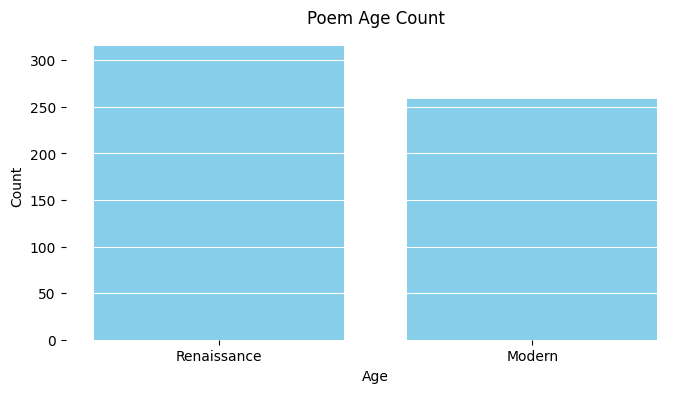

In [8]:
plt.figure(figsize = (8,4),frameon=False)
plt.bar(genre_counts['age'],genre_counts['count'],color='skyblue')
plt.xticks(genre_counts['age'])
plt.grid(color = 'White', axis = 'y')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Poem Age Count')
plt.box(False)
plt.show()

In [9]:
df['Text_Length'] = df['content'].apply(lambda x: len(x))

In [10]:
import numpy as np

# Calculate Scott's bin width
n = len(df['Text_Length'])
bin_width_scott = 3.5 * np.std(df['Text_Length']) / np.power(n, 1/3)

# Calculate number of bins
bin_range = df['Text_Length'].max() - df['Text_Length'].min()
num_bins_scott = int(bin_range / bin_width_scott)


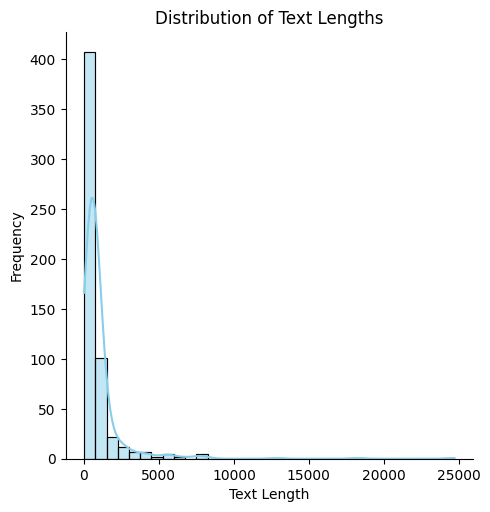

In [11]:
sns.displot(df['Text_Length'],kde=True, bins=num_bins_scott,color='skyblue')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

In [12]:
max_length = df['Text_Length'].max()
min_length = df['Text_Length'].min()
print(f'The maximum length of text in your dataframe is {max_length}')
print(f'The minimum length of text in your dataframe is {min_length}')

The maximum length of text in your dataframe is 24710
The minimum length of text in your dataframe is 15


In [13]:
average_length = np.sum(df['Text_Length'])/len(df)
print(f'The average length of text in the dataframe is {average_length}')

The average length of text in the dataframe is 989.8795811518324


In [14]:
q1 = df['Text_Length'].quantile(0.25)
q3 = df['Text_Length'].quantile(0.75)
iqr = q3 - q1

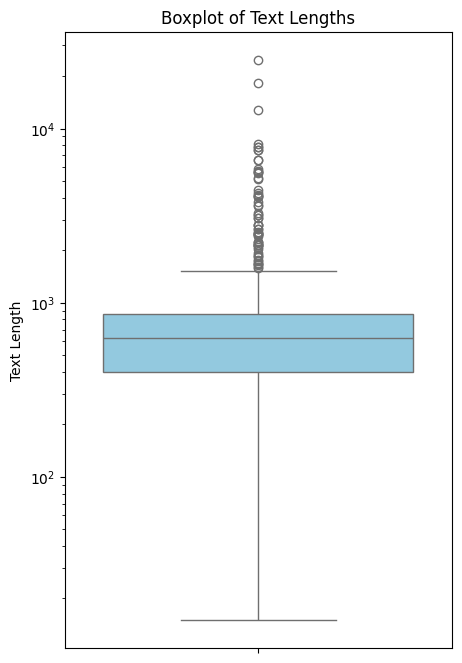

In [15]:
plt.figure(figsize=(5,8),frameon=False)
sns.boxplot(data=df, y='Text_Length',color='skyblue')
plt.ylabel('Text Length')
plt.title('Boxplot of Text Lengths')
plt.yscale('log')


plt.show()

# Data Preprocessing

In [16]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
# Stopword dictionary
from nltk.corpus import stopwords
nltk.download('stopwords')
# For stemming
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
text = df['content']

In [18]:
corpus = []
for i in range(len(text)):
    txt = re.sub('[^a-zA-Z0-9 ]','',text[i])
    txt = txt.lower()
    txt = txt.split()
    txt = [word for word in txt if not word in set(stopwords.words('english'))]
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = ' '.join(txt)
    corpus.append(txt)

In [19]:
corpus

['let bird loudest layon sole arabian treeherald sad trumpet beto whose sound chaste wing obeybut thou shrieking harbingerfoul precurrer fiendaugur fever endto troop come thou nearfrom session interdictevery fowl tyrant wingsave eagle featherd kingkeep obsequy strictlet priest surplice whitethat defunctive music canbe deathdivining swanlest requiem lack rightand thou trebledated crowthat thy sable gender makstwith breath thou givst takstmongst mourner shalt thou gohere anthem doth commencelove constancy deadphoenix turtle fledin mutual flame henceso lovd love twainhad essence onetwo distincts division nonenumber love slainhearts remote yet asunderdistance space seentwixt turtle queenbut wonderso love shinethat turtle saw rightflaming phoenix sighteither others mineproperty thus appalledthat self samesingle nature double nameneither two one calledreason confoundedsaw division grow togetherto yet either neithersimple well compoundedthat cried true twainseemeth concordant onelove reason r

In [20]:
word2count = {} # this is a list
for data in corpus:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [21]:
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

['love',
 'thy',
 'thou',
 'doth',
 'like',
 'one',
 'shall',
 'may',
 'thee',
 'eye',
 'heart',
 'make',
 'come',
 'let',
 'still',
 'world',
 'hath',
 'u',
 'beauty',
 'long',
 'upon',
 'yet',
 'fair',
 'soul',
 'time',
 'ye',
 'sweet',
 'would',
 'never',
 'thing',
 'day',
 'must',
 'see',
 'go',
 'know',
 'man',
 'life',
 'take',
 'old',
 'could',
 'first',
 'hand',
 'well',
 'great',
 'made',
 'heaven',
 'permission',
 'men',
 'every',
 'light',
 'copyright',
 'much',
 'ever',
 'though',
 'whose',
 'night',
 'look',
 'new',
 'body',
 'face',
 'little',
 'death',
 'mine',
 'unto',
 'art',
 'thought',
 'true',
 'say',
 'many',
 'might',
 'white',
 'poem',
 'earth',
 'good',
 'since',
 'forth',
 'till',
 'give',
 'think',
 'two',
 'mind',
 'lover',
 'word',
 'live',
 'leave',
 'way',
 'shadow',
 'find',
 'joy',
 'flower',
 'dead',
 'none',
 'far',
 'god',
 'bird',
 'thus',
 'end',
 'water',
 'back',
 'wind']

The word frequency is pretty interesting. Although it is just preliminary examination of the data, it can lead to other questions for the future. The most frequent word appears to be "love". Meaning many of these poems in the dataset have something to do with the topic of love. This is not entirely surprising, but it makes me inclined to explore sentiment analysis with poems focused on love in another project. Could an NLP model differentiate between positive and negative poems of the same topic, love?

## TF-IDF

In [22]:
target = df['age']

In [23]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

In [24]:
df['preprocessed_text'] = df['content'].apply(preprocess_text)


In [25]:
df.reset_index(inplace=True)

In [26]:
texts = df[['index','preprocessed_text']]

In [27]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(texts['preprocessed_text'])

In [28]:
tfidf_df = pd.DataFrame(tfidf_features.toarray(),index=texts.index.values, columns=tfidf_vectorizer.get_feature_names_out())

In [29]:
tfidf_df = (tfidf_df
            .stack()
            .reset_index()
            .rename(columns={0: 'tfidf', 'level_0': 'docID', 'level_1': 'term'})
           )

In [30]:
tfidf_df

,docID,term,tfidf
0,0,1019,0.0
1,0,13,0.0
2,0,1538,0.0
3,0,1904,0.0
4,0,19041962,0.0
...,...,...,...
6794629,572,zephyrs,0.0
6794630,572,zephyrus,0.0
6794631,572,zeus,0.0
6794632,572,zone,0.0


In [44]:
n = 5
top_tfidf = (tfidf_df
             .sort_values(by=['docID','tfidf'], ascending=[True,False])
             .groupby(['docID'])
             .head(n)
            )
top_tfidf

,docID,term,tfidf
7403,0,phoenix,0.286997
10694,0,turtle,0.223611
3176,0,either,0.176659
8067,0,reason,0.159719
10319,0,thou,0.159712
...,...,...,...
6790427,572,potuia,0.506277
6787546,572,hearest,0.379707
6793169,572,thy,0.266908
6793011,572,thee,0.178117


In [45]:
import altair as alt

# adding a little randomness to break ties in term ranking
top_tfidf_rand = top_tfidf.copy()
top_tfidf_rand['tfidf'] = top_tfidf_rand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

base = alt.Chart(top_tfidf_rand).encode(
    x = 'rank:O',
    y = 'docID:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["docID"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 800)

alt.LayerChart(...)

Through use of TF-IDF vectorization, we have created a dataframe containing the top most important words from each poem. The darker blue represent a higher TF-IDF score which shows that these words are the most important within their respective poems. This is simply another method of exploration with this data before we begin to build and evaluate models. I wanted to see what types of words were most commonly ranked higher in terms of TF-IDF, and I can conclude that quite a few words from early modern english were ranked more important. One thing that was uncertain to me in this project was how removing stopwords for english would only work for modern english text. I didn't know how this would impact the performance in models, but now I am wondering if the inclusion of these early modern stopwords like "thy","ye","thou", will be significant in the classification of early modern vs modern english.

---
# Building models

### Naive Bayes

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

label_encoder = LabelEncoder()
target_le =label_encoder.fit_transform(target)

In [34]:
for i in range(5):
    print(f'Original label: {target.iloc[i]} - Label encoded: {target_le[i]}')

Original label: Renaissance - Label encoded: 1
Original label: Renaissance - Label encoded: 1
Original label: Renaissance - Label encoded: 1
Original label: Renaissance - Label encoded: 1
Original label: Renaissance - Label encoded: 1


Note: Renaissance (Early Modern English) is labeled as 1, and Modern is labeled as 0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, target_le, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8434782608695652
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        48
           1       0.79      1.00      0.88        67

    accuracy                           0.84       115
   macro avg       0.89      0.81      0.83       115
weighted avg       0.88      0.84      0.83       115



In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [49]:
confusionmatrix = pd.DataFrame(conf_matrix,columns=['Predicted Renaissance','Predicted Modern'],index=['Actual Renaissance','Actual Modern'])

In [50]:
confusionmatrix

,Predicted Renaissance,Predicted Modern
Actual Renaissance,30,18
Actual Modern,0,67


Here we can see that the Naive-Bayes model accurately predicts poems from the Renaissance age, but predicted modern poems less accurately. Perhaps this is due to key stopwords in modern english being absent. Words such as "the" might be important to signify the difference in modern vs early modern english. This is something to keep in mind for future models.

---
### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

# Train Test Split - Test size 25%
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, target_le, test_size=0.25, random_state=123)

#Initialize logistic regression
logreg = LogisticRegression(random_state=123, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predict on test data
ypred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8958333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        70
           1       0.84      0.99      0.91        74

    accuracy                           0.90       144
   macro avg       0.91      0.89      0.89       144
weighted avg       0.91      0.90      0.89       144



In [55]:
conf_matrix = confusion_matrix(y_test, ypred)
confusion_df = pd.DataFrame(conf_matrix,columns=['Predicted Renaissance','Predicted Modern'],index=['Actual Renaissance','Actual Modern'])
confusion_df

,Predicted Renaissance,Predicted Modern
Actual Renaissance,56,14
Actual Modern,1,73


The logistic regression model had a better performance than the Naive Bayes model, which was not very surprising. Although the precision was slightly less, the recall for both classes was higher. This is something that I am striving for when building a model especially with two classes that are not very unbalanced.

* A note about Random Forest Classification. I originally thought it would be interesting to look at the performance of this model, but ended up skipping it in favor of moving straight to a Recurrent Neural Network. I tried it and got an error regarding the binary classes for the target variable. I reasoned that it was not worth trying to work around this as there most likely wouldn't have been much of a difference in performance compared to the last two models.

---
### Basic RNN

In [66]:
from sklearn.neural_network import MLPClassifier

In [69]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, target_le, test_size=0.25, random_state=123)

# Initialize RNN
brain  = MLPClassifier(hidden_layer_sizes=(100,100),solver='adam',activation='logistic',max_iter=2000)

In [70]:
brain.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=2000)

In [71]:
brain.score(X_test, y_test)

0.9375

In [72]:
y_pred = brain.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8958333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        70
           1       0.84      0.99      0.91        74

    accuracy                           0.90       144
   macro avg       0.91      0.89      0.89       144
weighted avg       0.91      0.90      0.89       144



In [73]:
conf = pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predicted Renaissance','Predicted Modern'],index=['Actual Renaissance','Actual Modern'])
conf

,Predicted Renaissance,Predicted Modern
Actual Renaissance,62,8
Actual Modern,1,73


The RNN performed the best out of all three models built. Overall, the accuracy, precision, and recall were all higher than any of the other models. I used the MLP Classifier, which is the Multi-layer Perceptron classifier. By default, this classifier uses Rectified Linear Unit (ReLU) activation and the Adam optimizer to produce the best results in this model. The adam optimizer differs from the lbfgs solver used in the previous models as it incorporates stochastic gradient descent. I believe this model is a great starting point for seeing how high of a performance that can result with this data.

---
### Improved RNN
One major thing to implement in this model is the use of stratified k-fold validation to increase accuracy.

In [77]:
from sklearn.model_selection import StratifiedKFold

# Initialize k-fold
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=123)

# Initialize MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100,100),solver='adam',activation='relu',max_iter=2000)

In [82]:
accuracy = []
for idxtrain, idxtest in skf.split(tfidf_features,target_le):
  xtrain = tfidf_features[idxtrain]
  xtest = tfidf_features[idxtest]
  ytrain = target_le[idxtrain]
  ytest = target_le[idxtest]
  model.fit(xtrain,ytrain)
  y_pred = model.predict(xtest)
  accuracy.append(accuracy_score(ytest,y_pred))

print(f"Average accuracy: {np.mean(accuracy)}")

Average accuracy: 0.9650937689050212


# Conclusion

Circling back to my initial questions going into this project:
- What words are more important for early modern vs modern english, through the use of TF-IDF?<br>
- How accurately can basic classification models predict the age of poems? <br>
- Which models, of the most popular, have the highest accuracy in these predictions? <br>
- How high of an accuracy can I obtain in the highest-performing classification model? <br>

I have gotten answers to all my questions. I found the most important words through TF-IDF and found that many early modern english words were deemed "important" within their respective poems. This could be helpful in classification and determining between the two styles of english. Many other important words had a relation to nature. This could be interesting for another research project. After implementing different models for classification, Naive-Bayes, Logistic Regression, and a Neural Network. I utilized the tfidf vectors for these models as, to my understanding, it is best to used as opposed to Word2vec when dealing with a smaller dataset. I knew that it was most likely for the neural network to have the highest performance, but I was interested in seeing how well the Naive-Bayes model and Logistic Regression models would perform. To my surprise, both models, even the Naive-Bayes model, performed very well on this data. After proving the neural network being the highest performing model, I tried a Stratified K-Fold split to see if it would improve performance at all. I wasn't sure about the use of this as the data did not contain a heavy imbalance in classes, however it did seem to improve the accuracy overall. <br>

A major issue that may have altered my results for this project is the lack of data. The data I was able to find was sourced from the Poetry Foundation and contained just under 600 different poems. This is not terribly small, but is still a relatively small dataset when building NLP models. <br>

Moving forward, I would find it interesting to pursue a research project that explores the sentiment analyis surrounding poems that focus on themes of love. The most frequent word across all the poems in this dataset was "love". It could be an interesting question to see how models can differentiate between positive and negative sentiment when given poems with the same theme. I would like to take more time to find a more comprehensive set of poems to train the model on, as I'm sure this would make the models more fleshed out. I very much enjoyed this project, and was grateful to be able to explore a topic of my choosing.